In [1737]:

import pandas as pd

# Show all columns
pd.set_option('display.max_columns', None)

# Widen the console line so pandas doesn't wrap or shorten rows
pd.set_option('display.width', 1000)  # You can increase this number if needed

# Also prevent truncating each column's content
pd.set_option('display.max_colwidth', None)
leads_df = pd.read_csv('leads.csv')
calls_df = pd.read_csv('calls.csv')
signups_df = pd.read_csv('signups.csv')

print('DONE')

DONE


In [1738]:
# Display basic information about each dataset
print("\nLeads Dataset Info:\n")
#leads_df.info()
leads_df.describe()
leads_df[leads_df['Age'] > 100].shape[0]

leads_df = leads_df[leads_df['Age'] <= 100].copy()

leads_df.head(10)



Leads Dataset Info:



,Name,Phone Number,Region,Sector,Age
0,Isabela MEZA,175718505368,north-west,wholesale,19
1,Deangelo LEE,937521423043,north-west,retail,38
2,Rosia MENDEZ,403640999962,midlands,agriculture,40
3,Jeremiah GALLOWAY,946740713605,scotland,food,23
4,Sarah POPE,264176984341,midlands,retail,18
5,Nolan VILLANUEVA,102993220908,north-west,wholesale,35
6,Wade AVERY,936057266681,south-west,construction,20
7,Karyn SHEPARD,416050061466,midlands,retail,60
8,Buster CALDERON,169044176823,south-west,food,21
9,Lu JACOBSON,477236163516,north-west,consultancy,28


In [ ]:
print("\nCalls Dataset Info:\n")
#calls_df.info()
#calls_df.head(10)
#calls_df.describe()




Calls Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phone Number  5000 non-null   int64 
 1   Call Outcome  5000 non-null   object
 2   Agent         5000 non-null   object
 3   Call Number   5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


,Phone Number,Call Number
count,5.000000e+03,5000.000000
mean,5.023974e+11,2499.500000
std,2.878335e+11,1443.520003
min,8.697492e+07,0.000000
25%,2.583950e+11,1249.750000
50%,5.043806e+11,2499.500000
75%,7.564105e+11,3749.250000
max,9.999519e+11,4999.000000


In [ ]:
#print("\nSignups Dataset Info:\n")
#signups_df.info()
#signups_df.head(10)
#signups_df.describe()



Signups Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Lead               768 non-null    object
 1   Approval Decision  768 non-null    object
dtypes: object(2)
memory usage: 12.1+ KB


,Lead,Approval Decision
count,768,768
unique,768,2
top,Tyree TERRY,REJECTED
freq,1,511


In [ ]:
#  Prioritizing the next 1000 uncalled leads to maximize signups using a machine learning approach
# print(leads_df.head(10))
# print(calls_df.head(10))
# pd.set_option('display.width', 300)


                Name  Phone Number      Region        Sector  Age
0       Isabela MEZA  175718505368  north-west     wholesale   19
1       Deangelo LEE  937521423043  north-west        retail   38
2       Rosia MENDEZ  403640999962    midlands   agriculture   40
3  Jeremiah GALLOWAY  946740713605    scotland          food   23
4         Sarah POPE  264176984341    midlands        retail   18
5   Nolan VILLANUEVA  102993220908  north-west     wholesale   35
6         Wade AVERY  936057266681  south-west  construction   20
7      Karyn SHEPARD  416050061466    midlands        retail   60
8    Buster CALDERON  169044176823  south-west          food   21
9        Lu JACOBSON  477236163516  north-west   consultancy   28
   Phone Number     Call Outcome   Agent  Call Number
0   83473306392   NOT INTERESTED  orange            0
1  762850680150  CALL BACK LATER  orange            1
2  476309275079   NOT INTERESTED  orange            2
3  899921761538  CALL BACK LATER     red            3
4  9

In [ ]:
# Get phone numbers in leads_df that are NOT in calls_df

print("Number of unique phone numbers in calls_df:", calls_df['Phone Number'].nunique())

# Contacted leads: phone numbers that exist in calls_df
contacted = leads_df[leads_df['Phone Number'].isin(calls_df['Phone Number'])]

# Uncontacted leads: phone numbers not found in calls_df
uncontacted = leads_df[~leads_df['Phone Number'].isin(calls_df['Phone Number'])]

print(contacted.head(10))



train_df = contacted.merge(calls_df, on='Phone Number', how='inner')










Number of unique phone numbers in calls_df: 2718
                Name  Phone Number      Region         Sector  Age
1       Deangelo LEE  937521423043  north-west         retail   38
4         Sarah POPE  264176984341    midlands         retail   18
9        Lu JACOBSON  477236163516  north-west    consultancy   28
12      Theron WELCH  533788208390  north-east  entertainment   36
15       Lilia OCHOA   80967872849  north-west      wholesale   33
16   Rosalind HORTON  804443519963       wales           food   32
18     Addison JONES  183488745758  south-west         retail   45
23  Cheryle CALDWELL  484404817049  north-west    consultancy   27
24     Tyree HARRELL  779853839503    scotland  entertainment   38
27      Naoma DURHAM  940509676942  south-east  entertainment   30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          4917 

,Name,Phone Number,Region,Sector,Age,Call Outcome,Agent,Call Number
0,Deangelo LEE,937521423043,north-west,retail,38,CALL BACK LATER,black,2213
1,Deangelo LEE,937521423043,north-west,retail,38,CALL BACK LATER,orange,2313
2,Deangelo LEE,937521423043,north-west,retail,38,INTERESTED,orange,2413
3,Sarah POPE,264176984341,midlands,retail,18,NOT INTERESTED,red,3211
4,Lu JACOBSON,477236163516,north-west,consultancy,28,CALL BACK LATER,green,2049
5,Lu JACOBSON,477236163516,north-west,consultancy,28,INTERESTED,orange,2149
6,Theron WELCH,533788208390,north-east,entertainment,36,ANSWER MACHINE,red,1107
7,Theron WELCH,533788208390,north-east,entertainment,36,INTERESTED,green,1207
8,Lilia OCHOA,80967872849,north-west,wholesale,33,INTERESTED,black,1333
9,Rosalind HORTON,804443519963,wales,food,32,NOT INTERESTED,orange,915


In [1752]:
# Get the last call per lead using groupby and idxmax
idx = train_df.groupby('Phone Number')['Call Number'].idxmax()
last_call_df = train_df.loc[idx].sort_index().reset_index(drop=True)
display(last_call_df.head(10))



last_call_df['Is_Signup'] = last_call_df['Name'].isin(signups_df['Lead']).astype(int)
display(last_call_df.head(10))




,Name,Phone Number,Region,Sector,Age,Call Outcome,Agent,Call Number
0,Deangelo LEE,937521423043,north-west,retail,38,INTERESTED,orange,2413
1,Sarah POPE,264176984341,midlands,retail,18,NOT INTERESTED,red,3211
2,Lu JACOBSON,477236163516,north-west,consultancy,28,INTERESTED,orange,2149
3,Theron WELCH,533788208390,north-east,entertainment,36,INTERESTED,green,1207
4,Lilia OCHOA,80967872849,north-west,wholesale,33,INTERESTED,black,1333
5,Rosalind HORTON,804443519963,wales,food,32,NOT INTERESTED,orange,915
6,Addison JONES,183488745758,south-west,retail,45,NOT INTERESTED,orange,2166
7,Cheryle CALDWELL,484404817049,north-west,consultancy,27,INTERESTED,orange,473
8,Tyree HARRELL,779853839503,scotland,entertainment,38,NOT INTERESTED,black,1546
9,Naoma DURHAM,940509676942,south-east,entertainment,30,INTERESTED,black,2013


,Name,Phone Number,Region,Sector,Age,Call Outcome,Agent,Call Number,Is_Signup
0,Deangelo LEE,937521423043,north-west,retail,38,INTERESTED,orange,2413,1
1,Sarah POPE,264176984341,midlands,retail,18,NOT INTERESTED,red,3211,0
2,Lu JACOBSON,477236163516,north-west,consultancy,28,INTERESTED,orange,2149,1
3,Theron WELCH,533788208390,north-east,entertainment,36,INTERESTED,green,1207,1
4,Lilia OCHOA,80967872849,north-west,wholesale,33,INTERESTED,black,1333,0
5,Rosalind HORTON,804443519963,wales,food,32,NOT INTERESTED,orange,915,0
6,Addison JONES,183488745758,south-west,retail,45,NOT INTERESTED,orange,2166,0
7,Cheryle CALDWELL,484404817049,north-west,consultancy,27,INTERESTED,orange,473,0
8,Tyree HARRELL,779853839503,scotland,entertainment,38,NOT INTERESTED,black,1546,0
9,Naoma DURHAM,940509676942,south-east,entertainment,30,INTERESTED,black,2013,1


In [1753]:
# static_features = ['Region', 'Sector', 'Age']
# df = leads_df.copy()
# df['Is_Signup'] = df['Name'].str.lower().isin(signups_df['Lead'].str.lower()).astype(int)
# df = pd.get_dummies(df[static_features + ['Is_Signup']], columns=['Region', 'Sector'], drop_first=True)
# display(df.head(10))
# X = df.drop('Is_Signup', axis=1)
# y = df['Is_Signup']


X = pd.get_dummies(last_call_df[['Region', 'Sector', 'Age']], drop_first=True)
y = last_call_df['Is_Signup']

display(X.head(100))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)



,Age,Region_midlands,Region_north-east,Region_north-west,Region_northern-ireland,Region_scotland,Region_south,Region_south-east,Region_south-west,Region_wales,Sector_construction,Sector_consultancy,Sector_entertainment,Sector_food,Sector_retail,Sector_wholesale
0,38,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,18,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,28,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,36,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
4,33,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
96,55,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
97,28,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
98,54,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


Random Forest AUC Score: 0.5802414021164021
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       480
           1       0.33      0.09      0.14       189

    accuracy                           0.69       669
   macro avg       0.52      0.51      0.48       669
weighted avg       0.61      0.69      0.62       669

XGBoost AUC Score: 0.5721340388007053
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       480
           1       0.33      0.05      0.09       189

    accuracy                           0.70       669
   macro avg       0.53      0.51      0.46       669
weighted avg       0.61      0.70      0.62       669



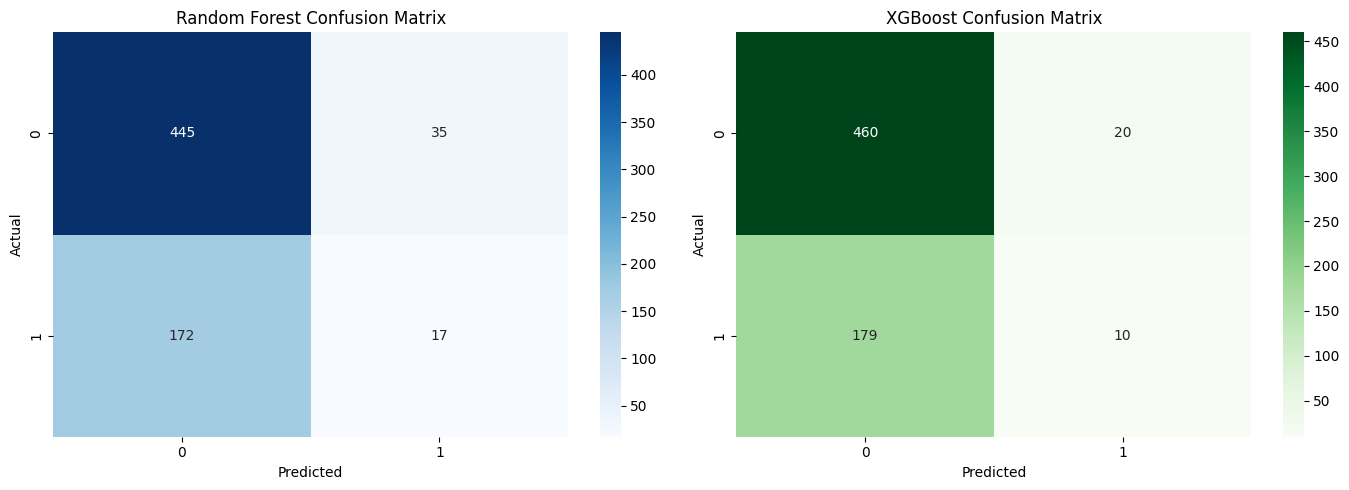

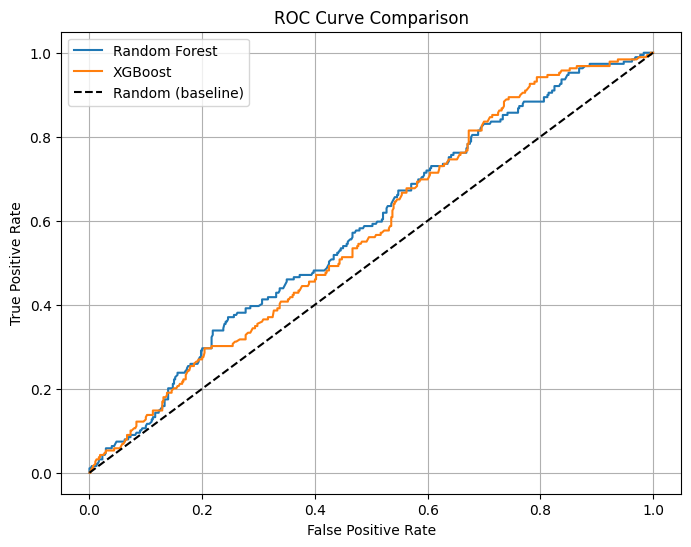

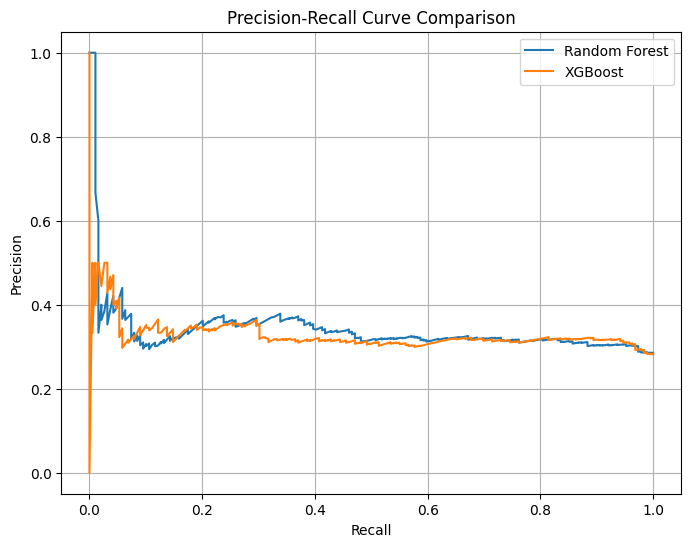

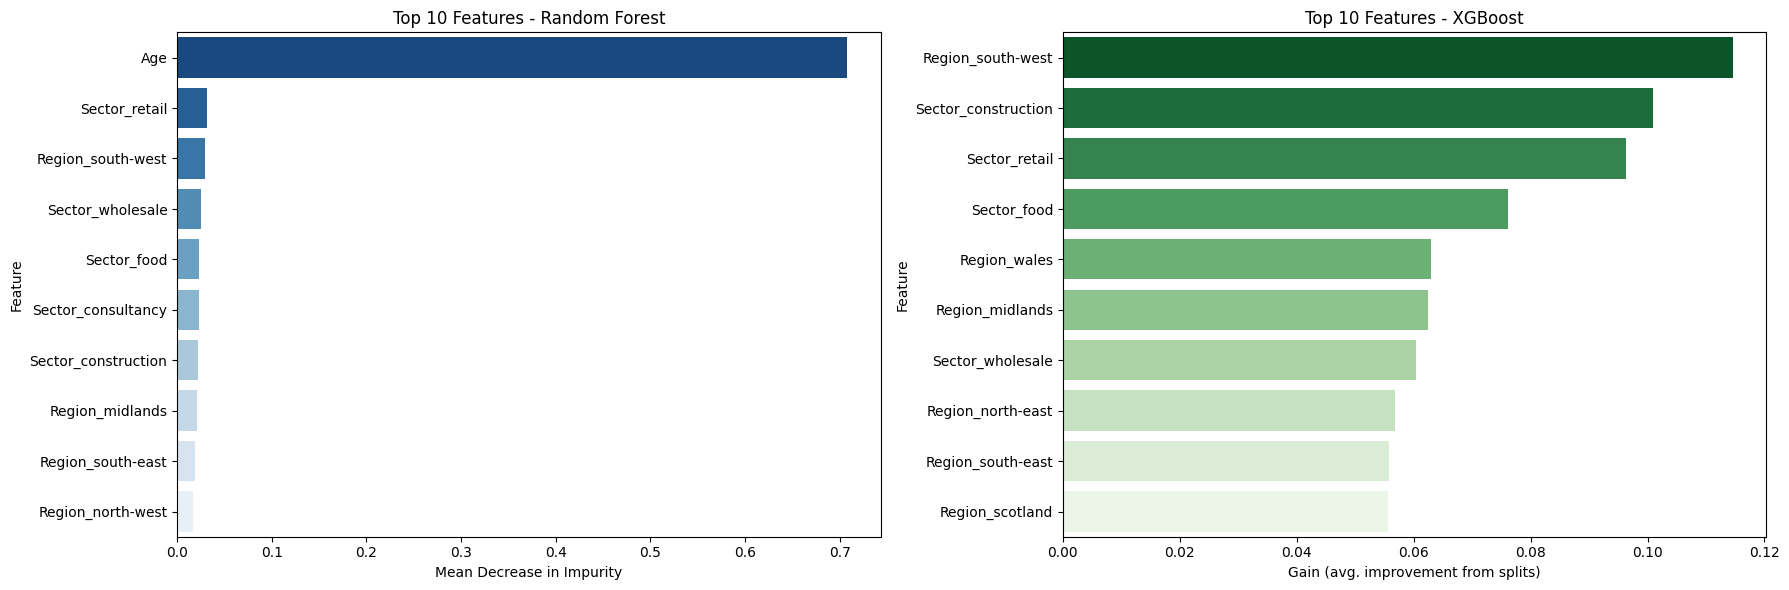

                Feature  Importance
0                   Age    0.707953
14        Sector_retail    0.031426
8     Region_south-west    0.029781
15     Sector_wholesale    0.025480
13          Sector_food    0.023189
11   Sector_consultancy    0.023036
10  Sector_construction    0.021518
1       Region_midlands    0.020837
7     Region_south-east    0.019315
3     Region_north-west    0.016876
                Feature  Importance
8     Region_south-west    0.114620
10  Sector_construction    0.100921
14        Sector_retail    0.096403
13          Sector_food    0.076112
9          Region_wales    0.062912
1       Region_midlands    0.062493
15     Sector_wholesale    0.060390
2     Region_north-east    0.056728
7     Region_south-east    0.055700
5       Region_scotland    0.055597


In [ ]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ========================
# 1. AUC + Classification Report
# ========================
print("Random Forest AUC Score:", roc_auc_score(y_test, rf_probs))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

print("XGBoost AUC Score:", roc_auc_score(y_test, xgb_probs))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

# ========================
# 2. Confusion Matrices
# ========================
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# ========================
# 3. ROC Curve
# ========================
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random (baseline)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# ========================
# 4. Precision-Recall Curve
# ========================
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# ========================
# 5. Feature Importances
# ========================
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

sns.barplot(data=rf_importances, x='Importance', y='Feature', ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 10 Features - Random Forest")
axes[0].set_xlabel("Mean Decrease in Impurity")
axes[0].set_ylabel("Feature")

sns.barplot(data=xgb_importances, x='Importance', y='Feature', ax=axes[1], palette='Greens_r')
axes[1].set_title("Top 10 Features - XGBoost")
axes[1].set_xlabel("Gain (avg. improvement from splits)")
axes[1].set_ylabel("Feature")

plt.tight_layout()
plt.show()


import pandas as pd

rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importances.head(10))  # Top 10 features

xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(xgb_importances.head(10))  # Top 10 features


In [ ]:
# 1. Get list of called phone numbers
called_numbers = last_call_df['Phone Number'].unique()

# 2. Filter leads_df to get uncalled leads
uncalled_leads = leads_df[~leads_df['Phone Number'].isin(called_numbers)].copy()

# 3. Optional: Reset index
uncalled_leads.reset_index(drop=True, inplace=True)

display(uncalled_leads.head(10))

# 1. Make a copy of uncalled leads data (same features as training)
uncalled_features = pd.get_dummies(uncalled_leads[['Region', 'Sector', 'Age']], drop_first=True)
display(uncalled_features.head(10))

# 2. Predict signup probabilities using XGBoost
uncalled_leads['Signup_Probability'] = xgb_model.predict_proba(uncalled_features)[:, 1]

display(uncalled_leads.head(10))


# 3. Sort leads by probability (highest first)
top_1000 = uncalled_leads.sort_values(by='Signup_Probability', ascending=False).head(1000)

# 4. Optional: Add rank column
top_1000['Signup_Rank'] = range(1, len(top_1000) + 1)

display(top_1000.head(100))
# 5. Export to CSV
top_1000.to_csv("top_1000_prioritized_leads.csv", index=False)

print("✅ Top 1,000 prioritized uncalled leads saved as 'top_1000_prioritized_leads.csv'")

,Name,Phone Number,Region,Sector,Age
0,Isabela MEZA,175718505368,north-west,wholesale,19
1,Rosia MENDEZ,403640999962,midlands,agriculture,40
2,Jeremiah GALLOWAY,946740713605,scotland,food,23
3,Nolan VILLANUEVA,102993220908,north-west,wholesale,35
4,Wade AVERY,936057266681,south-west,construction,20
5,Karyn SHEPARD,416050061466,midlands,retail,60
6,Buster CALDERON,169044176823,south-west,food,21
7,Faye MONTOYA,91240772196,north-west,entertainment,22
8,Jewell FULLER,370321787993,south-west,wholesale,22
9,Monnie ATKINSON,451465100941,north-west,entertainment,42


,Age,Region_midlands,Region_north-east,Region_north-west,Region_northern-ireland,Region_scotland,Region_south,Region_south-east,Region_south-west,Region_wales,Sector_construction,Sector_consultancy,Sector_entertainment,Sector_food,Sector_retail,Sector_wholesale
0,19,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,40,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,23,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
4,20,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
5,60,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,21,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
7,22,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
8,22,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
9,42,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


,Name,Phone Number,Region,Sector,Age,Signup_Probability
0,Isabela MEZA,175718505368,north-west,wholesale,19,0.491803
1,Rosia MENDEZ,403640999962,midlands,agriculture,40,0.216656
2,Jeremiah GALLOWAY,946740713605,scotland,food,23,0.244598
3,Nolan VILLANUEVA,102993220908,north-west,wholesale,35,0.279624
4,Wade AVERY,936057266681,south-west,construction,20,0.086736
5,Karyn SHEPARD,416050061466,midlands,retail,60,0.166866
6,Buster CALDERON,169044176823,south-west,food,21,0.571931
7,Faye MONTOYA,91240772196,north-west,entertainment,22,0.278632
8,Jewell FULLER,370321787993,south-west,wholesale,22,0.434607
9,Monnie ATKINSON,451465100941,north-west,entertainment,42,0.317229


,Name,Phone Number,Region,Sector,Age,Signup_Probability,Signup_Rank
1553,Karl VALENTINE,918862296300,south-west,wholesale,65,0.779515,1
3287,Trever MELENDEZ,659335414155,south-west,wholesale,65,0.779515,2
2279,Aline CARNEY,29835921447,north-west,wholesale,65,0.778061,3
6338,Manie HICKS,214850150807,south-east,wholesale,65,0.743563,4
2706,Robbie ARIAS,992938274261,south-west,consultancy,97,0.737911,5
...,...,...,...,...,...,...,...
2502,Leonia STARK,622355782571,south-west,food,26,0.631204,96
7040,Kitty HORTON,578338009865,south-west,food,26,0.631204,97
5651,Brandie SELLERS,829447772095,south-west,food,26,0.631204,98
6786,Aloysius NORMAN,807379535159,south-west,food,26,0.631204,99


✅ Top 1,000 prioritized uncalled leads saved as 'top_1000_prioritized_leads.csv'
